### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import Dataset
import librosa

### Load data

In [3]:
# spectrogram
spects = Dataset.from_parquet("data/spectrogram.parquet")
# mfccs
mfccs = Dataset.from_parquet("data/mfcc.parquet")
# phenotypes
phen_df = pd.read_csv("data/phenotype.tsv", sep="\t", header=0)
# static features
static_df = pd.read_csv("data/static_features.tsv", sep="\t", header=0)

Loading dataset shards:   0%|          | 0/17 [00:00<?, ?it/s]

### Take a look at the data

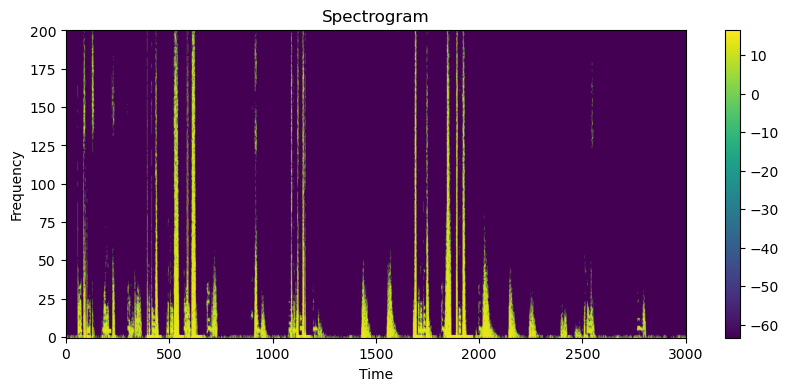

In [4]:
spectrogram = librosa.power_to_db(np.asarray(spects[0]['spectrogram']))
plt.figure(figsize=(10, 4))
plt.imshow(spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

In [5]:
spects.shape

(16738, 4)

In [6]:
spects[0]

{'participant_id': '004d42e9',
 'session_id': '07031CC3',
 'task_name': 'Animal-fluency',
 'spectrogram': [[3.249654531478882,
   0.863341212272644,
   0.29140451550483704,
   -15.26160717010498,
   2.940626382827759,
   5.63228702545166,
   9.833924293518066,
   7.563019752502441,
   -0.4675159454345703,
   -9.411867141723633,
   -4.407148361206055,
   4.408207416534424,
   -10.352636337280273,
   -2.7159194946289062,
   7.510432720184326,
   -6.712429046630859,
   -2.4839999675750732,
   -1.3373339176177979,
   3.6694886684417725,
   -0.5923928022384644,
   -0.7038589715957642,
   6.440308094024658,
   12.722314834594727,
   5.867834568023682,
   -3.4546046257019043,
   7.427101135253906,
   0.4248526096343994,
   3.248087167739868,
   8.842702865600586,
   5.091047763824463,
   -2.9307613372802734,
   4.683992862701416,
   -6.889643669128418,
   4.91237211227417,
   9.184759140014648,
   -23.362043380737305,
   5.89236307144165,
   3.8171725273132324,
   -10.85934066772461,
   7.271

In [7]:
phen_df

participant_id redcap_repeat_instrument  redcap_repeat_instance  \
0         004d42e9              Participant                     1.0   
1         01401050              Participant                     1.0   
2         016023f6              Participant                     1.0   
3         02624589              Participant                     1.0   
4         02955d67              Participant                     1.0   
..             ...                      ...                     ...   
437       fc603d45              Participant                     1.0   
438       fc61a1ff              Participant                     1.0   
439       fe6cefa7              Participant                     1.0   
440       ff58dff0              Participant                     1.0   
441       ff75b163              Participant                     1.0   

    selected_language   age eligible_studies___1  \
0             English  75.0                  NaN   
1             English  74.0                  NaN   
2             English  78.0      Voice Disorders   
3             English  82.0      Voice Disorders   
4             English  76.0      Voice Disorders   
..                ...   ...                  ...   
437           English  81.0                  NaN   
438           English  72.0      Voice Disorders   
439           English  50.0      Voice Disorders   
440           English  21.0      Voice Disorders   
441           English  69.0      Voice Disorders   

                             eligible_studies___2  \
0    Neurological and Neurodegenerative Disorders   
1    Neurological and Neurodegenerative Disorders   
2                                             NaN   
3                                             NaN   
4    Neurological and Neurodegenerative Disorders   
..                                            ...   
437  Neurological and Neurodegenerative Disorders   
438                                           NaN   
439                                           NaN   
440  Neurological and Neurodegenerative Disorders   
441                                           NaN   

               eligible_studies___3   eligible_studies___4  \
0    Mood and Psychiatric Disorders                    NaN   
1    Mood and Psychiatric Disorders                    NaN   
2                               NaN                    NaN   
3                               NaN                    NaN   
4    Mood and Psychiatric Disorders  Respiratory Disorders   
..                              ...                    ...   
437                             NaN                    NaN   
438                             NaN  Respiratory Disorders   
439                             NaN  Respiratory Disorders   
440  Mood and Psychiatric Disorders  Respiratory Disorders   
441                             NaN                    NaN   

     eligible_studies___5  ... vocabulary_item_word_4  \
0                     NaN  ...               minority   
1                     NaN  ...            battlewagon   
2                     NaN  ...                    NaN   
3                     NaN  ...                    NaN   
4                     NaN  ...                    NaN   
..                    ...  ...                    ...   
437                   NaN  ...            uncorrupted   
438                   NaN  ...                    NaN   
439                   NaN  ...                    NaN   
440                   NaN  ...                 marine   
441                   NaN  ...                    NaN   

    vocabulary_item_difficulty_4 vocabulary_item_word_5  \
0                            2.0              denigrate   
1                            2.0                   clef   
2                            NaN                    NaN   
3                            NaN                    NaN   
4                            NaN                    NaN   
..                           ...                    ...   
437                          2.0              

In [8]:
phen_df.columns

Index(['participant_id', 'redcap_repeat_instrument', 'redcap_repeat_instance',
       'selected_language', 'age', 'eligible_studies___1',
       'eligible_studies___2', 'eligible_studies___3', 'eligible_studies___4',
       'eligible_studies___5',
       ...
       'vocabulary_item_word_4', 'vocabulary_item_difficulty_4',
       'vocabulary_item_word_5', 'vocabulary_item_difficulty_5',
       'vocabulary_item_word_6', 'vocabulary_item_difficulty_6',
       'random_session_id', 'random_recording_acoustic_task_id',
       'random_duration', 'random_item_generation_category'],
      dtype='object', length=1109)

In [9]:
# how many participants are there for each study?
disorders = [
    "Voice Disorders",
    "Neurological and Neurodegenerative Disorders",
    "Mood and Psychiatric Disorders",
    "Respiratory Disorders"
]
for idx,d in enumerate(disorders):
    l = len(phen_df[phen_df[f"eligible_studies___{idx+1}"]==d])
    print(d + " -- " + str(l) + " participants")

Voice Disorders -- 230 participants
Neurological and Neurodegenerative Disorders -- 160 participants
Mood and Psychiatric Disorders -- 145 participants
Respiratory Disorders -- 226 participants


In [10]:
# clean up category headers b/c they are annoyingly structured
proc_phen_df = phen_df.copy()
proc_phen_df["Voice Disorders"] = [row.eligible_studies___1 == "Voice Disorders" for idx,row in phen_df.iterrows()]
proc_phen_df["Neurological and Neurodegenerative Disorders"] = [row.eligible_studies___2 == "Neurological and Neurodegenerative Disorders" for idx,row in phen_df.iterrows()]
proc_phen_df["Mood and Psychiatric Disorders"] = [row.eligible_studies___3 == "Mood and Psychiatric Disorders" for idx,row in phen_df.iterrows()]
proc_phen_df["Respiratory Disorders"] = [row.eligible_studies___4 == "Respiratory Disorders" for idx,row in phen_df.iterrows()]
proc_phen_df.drop(columns=["eligible_studies___1","eligible_studies___2","eligible_studies___3","eligible_studies___4","eligible_studies___5"],inplace=True)
proc_phen_df

participant_id redcap_repeat_instrument  redcap_repeat_instance  \
0         004d42e9              Participant                     1.0   
1         01401050              Participant                     1.0   
2         016023f6              Participant                     1.0   
3         02624589              Participant                     1.0   
4         02955d67              Participant                     1.0   
..             ...                      ...                     ...   
437       fc603d45              Participant                     1.0   
438       fc61a1ff              Participant                     1.0   
439       fe6cefa7              Participant                     1.0   
440       ff58dff0              Participant                     1.0   
441       ff75b163              Participant                     1.0   

    selected_language   age is_control_participant laryng_cancer  \
0             English  75.0                     No     Unchecked   
1             English  74.0                     No     Unchecked   
2             English  78.0                     No     Unchecked   
3             English  82.0                     No     Unchecked   
4             English  76.0                    Yes     Unchecked   
..                ...   ...                    ...           ...   
437           English  81.0                     No     Unchecked   
438           English  72.0                     No     Unchecked   
439           English  50.0                     No     Unchecked   
440           English  21.0                    Yes     Unchecked   
441           English  69.0                     No     Unchecked   

    benign_cord_lesion        rrp   spas_dys  ... vocabulary_item_word_6  \
0            Unchecked  Unchecked  Unchecked  ...            affirmation   
1            Unchecked  Unchecked  Unchecked  ...                surreal   
2            Unchecked  Unchecked    Checked  ...                    NaN   
3            Unchecked  Unchecked    Checked  ...                    NaN   
4            Unchecked  Unchecked  Unchecked  ...                    NaN   
..                 ...        ...        ...  ...                    ...   
437          Unchecked  Unchecked  Unchecked  ...       compartmentalize   
438          Unchecked  Unchecked  Unchecked  ...                    NaN   
439          Unchecked  Unchecked  Unchecked  ...                    NaN   
440          Unchecked  Unchecked  Unchecked  ...              aquaplane   
441            Checked  Unchecked  Unchecked  ...                    NaN   

    vocabulary_item_difficulty_6 random_session_id  \
0                            3.0          07031CC3   
1                            3.0          09E64686   
2                            NaN               NaN   
3                            NaN               NaN   
4                            NaN               NaN   
..                           ...               ...   
437                          3.0          CD772E40   
438                          NaN               NaN   
439                          NaN               NaN   
440                          3.0          A5484A20   
441                          NaN               NaN   

        random_recording_acoustic_task_id random_duration  \
0    A91D679E-201E-49AF-AD3D-D988836B3BCC            83.0   
1    AAC88E40-7F5C-40D6-BA68-93A01923E467           192.0   
2                                     NaN             NaN   
3                                     NaN             NaN   
4                                     NaN             NaN   
..                                    ...             ...   
437  A8ABD411-49FB-4FAE-8E58-445A1A3BE711            64.0   
438                                   NaN             NaN   
439                                   NaN             NaN   
440  0598F4BC-52E6-4302-8EF7-F3C9AA6097DE            50.0   
441                                   NaN             NaN   

     random_item_generation_category Vo

In [11]:
mfccs

Dataset({
    features: ['participant_id', 'session_id', 'task_name', 'mfcc'],
    num_rows: 16738
})

### Grab subset of data for vocal disorders

#### phenotype data

In [12]:
voc_df = proc_phen_df[proc_phen_df["Voice Disorders"]==True].reset_index(drop=True)
voc_df

participant_id redcap_repeat_instrument  redcap_repeat_instance  \
0         016023f6              Participant                     1.0   
1         02624589              Participant                     1.0   
2         02955d67              Participant                     1.0   
3         02a473a2              Participant                     1.0   
4         03252baf              Participant                     1.0   
..             ...                      ...                     ...   
225       fbf55cc0              Participant                     1.0   
226       fc61a1ff              Participant                     1.0   
227       fe6cefa7              Participant                     1.0   
228       ff58dff0              Participant                     1.0   
229       ff75b163              Participant                     1.0   

    selected_language   age is_control_participant laryng_cancer  \
0             English  78.0                     No     Unchecked   
1             English  82.0                     No     Unchecked   
2             English  76.0                    Yes     Unchecked   
3             English  55.0                     No     Unchecked   
4             English  35.0                     No     Unchecked   
..                ...   ...                    ...           ...   
225           English  42.0                     No     Unchecked   
226           English  72.0                     No     Unchecked   
227           English  50.0                     No     Unchecked   
228           English  21.0                    Yes     Unchecked   
229           English  69.0                     No     Unchecked   

    benign_cord_lesion        rrp   spas_dys  ... vocabulary_item_word_6  \
0            Unchecked  Unchecked    Checked  ...                    NaN   
1            Unchecked  Unchecked    Checked  ...                    NaN   
2            Unchecked  Unchecked  Unchecked  ...                    NaN   
3              Checked  Unchecked  Unchecked  ...                    NaN   
4              Checked  Unchecked  Unchecked  ...                    NaN   
..                 ...        ...        ...  ...                    ...   
225            Checked  Unchecked  Unchecked  ...                    NaN   
226          Unchecked  Unchecked  Unchecked  ...                    NaN   
227          Unchecked  Unchecked  Unchecked  ...                    NaN   
228          Unchecked  Unchecked  Unchecked  ...              aquaplane   
229            Checked  Unchecked  Unchecked  ...                    NaN   

    vocabulary_item_difficulty_6 random_session_id  \
0                            NaN               NaN   
1                            NaN               NaN   
2                            NaN               NaN   
3                            NaN               NaN   
4                            NaN               NaN   
..                           ...               ...   
225                          NaN               NaN   
226                          NaN               NaN   
227                          NaN               NaN   
228                          3.0          A5484A20   
229                          NaN               NaN   

        random_recording_acoustic_task_id random_duration  \
0                                     NaN             NaN   
1                                     NaN             NaN   
2                                     NaN             NaN   
3                                     NaN             NaN   
4                                     NaN             NaN   
..                                    ...             ...   
225                                   NaN             NaN   
226                                   NaN             NaN   
227                                   NaN             NaN   
228  0598F4BC-52E6-4302-8EF7-F3C9AA6097DE            50.0   
229                                   NaN             NaN   

    random_item_generation_category Voi

In [13]:
# save data
voc_df.to_csv("data/vocal_phenotype.tsv", sep='\t', index=False)

In [14]:
voc_parts = voc_df["participant_id"].tolist()
voc_parts

['016023f6',
 '02624589',
 '02955d67',
 '02a473a2',
 '03252baf',
 '04c8ec5d',
 '0550ca66',
 '05bf77bd',
 '061cec48',
 '06b0a943',
 '0b9b68cf',
 '0c9d86bd',
 '0d3b5898',
 '121cb404',
 '14acce61',
 '15943fd6',
 '164584f3',
 '16d47927',
 '187daaed',
 '1965766f',
 '19d8e0d5',
 '1c2f13bb',
 '1c611192',
 '1d4c9125',
 '207cfb46',
 '21140bbf',
 '211cf773',
 '22835849',
 '2283ffb7',
 '248e1284',
 '26659080',
 '268ddca6',
 '27966448',
 '27bc5c71',
 '27e1ed7f',
 '28127962',
 '2a1f9cb3',
 '2a86baba',
 '2b0751d5',
 '2c8f5125',
 '2cb545bb',
 '2cd426ca',
 '2de86669',
 '2e59cc45',
 '2e71bcdb',
 '2f58e101',
 '2f9f315d',
 '30f67dd4',
 '31054d13',
 '3116c7be',
 '323ebc68',
 '32e5d178',
 '33e8711c',
 '35bd7df4',
 '3647afc1',
 '3667f1d6',
 '37b55168',
 '37c34096',
 '383da76a',
 '3b65d2e8',
 '3b7ace99',
 '3bbc69ef',
 '3c606012',
 '3c6a97e9',
 '3d446af4',
 '3dd42e99',
 '3f84308d',
 '41bf6015',
 '4276a769',
 '430950c2',
 '43869e1b',
 '43d009e5',
 '44c2e56d',
 '4866db01',
 '4896160e',
 '494ce7ce',
 '4f76964e',

#### static features

In [15]:
voc_static_df = static_df.copy()
drop_inds = [idx for idx,row in voc_static_df.iterrows() if row.participant_id not in voc_parts]
voc_static_df.drop(drop_inds,inplace=True)
voc_static_df.reset_index(drop=True,inplace=True)
voc_static_df

participant_id session_id                                  task_name  \
0          016023f6   D171203B                              Audio-Check-1   
1          016023f6   D171203B                              Audio-Check-2   
2          016023f6   D171203B                              Audio-Check-3   
3          016023f6   D171203B                              Audio-Check-4   
4          016023f6   D171203B                         Cape-V-sentences-1   
...             ...        ...                                        ...   
9534       ff75b163   6A3E7090        Respiration-and-cough-FiveBreaths-3   
9535       ff75b163   6A3E7090        Respiration-and-cough-FiveBreaths-4   
9536       ff75b163   6A3E7090  Respiration-and-cough-ThreeQuickBreaths-1   
9537       ff75b163   6A3E7090  Respiration-and-cough-ThreeQuickBreaths-2   
9538       ff75b163   6A3E7090                               Story-recall   

                                          transcription  \
0                             Testing. One, two, three.   
1     I am happy to participate in the Bridge to AI ...   
2             Cough, cough, cough, cough, cough, cough.   
3                                           Ah, ah, ah.   
4                    The blue spot is on the key again.   
...                                                 ...   
9534  I was going to tell you all, Galilee. Other th...   
9535                                                  .   
9536                                                 Oh   
9537                                                 Oh   
9538  Grandfather was about 93 years old. He had a l...   

      F0semitoneFrom27.5Hz_sma3nz_amean  \
0                             33.730289   
1                             34.505173   
2                             48.487789   
3                              0.000000   
4                             34.155563   
...                                 ...   
9534                          30.285301   
9535                           0.000000   
9536                           0.000000   
9537                           0.000000   
9538                          25.704922   

      F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                   0.098531   
1                                   0.084670   
2                                   0.132327   
3                                   0.000000   
4                                   0.141751   
...                                      ...   
9534                                0.161516   
9535                                0.000000   
9536                                0.000000   
9537                                0.000000   
9538                                0.102639   

      F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                      31.320843   
1                                      32.393768   
2                                      45.220436   
3                                       0.000000   
4                                      30.144558   
...                                          ...   
9534                                   22.592297   
9535                                    0.000000   
9536                                    0.000000   
9537                                    0.000000   
9538                                   24.731934   

      F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                      34.443005   
1                                      34.899578   
2                                      45.978088   
3                                       0.000000   
4                                      33.732563   
...                                          ...   
9534                                   32.917130   
9535                                    0.000000   
9536                                    0.000000   
9537                                    0.000000   
9538                                   26.023228   

      F0semitoneFrom27.5Hz_

In [16]:
# quick check to make sure participant ids are correct
for p in voc_static_df.participant_id.unique():
    if p not in voc_parts:
        print(p)

In [17]:
# save data
voc_static_df.to_csv("data/vocal_static_features.tsv", sep='\t', index=False)

#### spectrograms

In [49]:
spects

Dataset({
    features: ['participant_id', 'session_id', 'task_name', 'spectrogram'],
    num_rows: 16738
})

In [35]:
voc_spects = spects.filter(lambda features: features["participant_id"] in voc_parts)

Filter:   0%|          | 0/16738 [00:00<?, ? examples/s]

In [39]:
# check filter results
for s in voc_spects:
    p = s["participant_id"]
    if p not in voc_parts:
        print(p)

KeyboardInterrupt: 

In [40]:
voc_spects.shape

(8297, 4)

In [41]:
# save data
voc_spects.to_parquet("data/vocal_spectrograms.parquet")

Creating parquet from Arrow format:   0%|          | 0/63 [00:00<?, ?ba/s]

5908904156

#### mfcc's

In [52]:
voc_mfccs = mfccs.filter(lambda features: features["participant_id"] in voc_parts)

Filter:   0%|          | 0/16738 [00:00<?, ? examples/s]

In [53]:
voc_mfccs.shape

(8297, 4)

In [54]:
voc_mfccs.to_parquet("data/vocal_mfcc.parquet")

Creating parquet from Arrow format:   0%|          | 0/19 [00:00<?, ?ba/s]

1764166856